In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [203]:
xlsx = pd.ExcelFile('Omnify-Analyst-Intership-Task.xlsx')
df1 = pd.read_excel(xlsx, 'Google Ads Data')
df2 = pd.read_excel(xlsx, 'Listing Site Data')
df1=df1.drop(['Payment ($)', 'Payment Date', 'Country', 'Leads', 'Currency', 'Prospects'], axis=1)
df2=df2.drop(['Leads', 'Paid', 'Paid Date', 'Prospects'], axis=1)
df2['Date of Report'] = pd.to_datetime(df2['Date of Report']) 
df2['Date of Report Index'] = df2['Date of Report'].dt.strftime('%m-%d-%y')
df2['Date of Report Index'] = pd.to_datetime(df2['Date of Report Index'], format='%m-%d-%y') 
df1=df1.set_index('Week')
df2=df2.set_index('Date of Report Index')

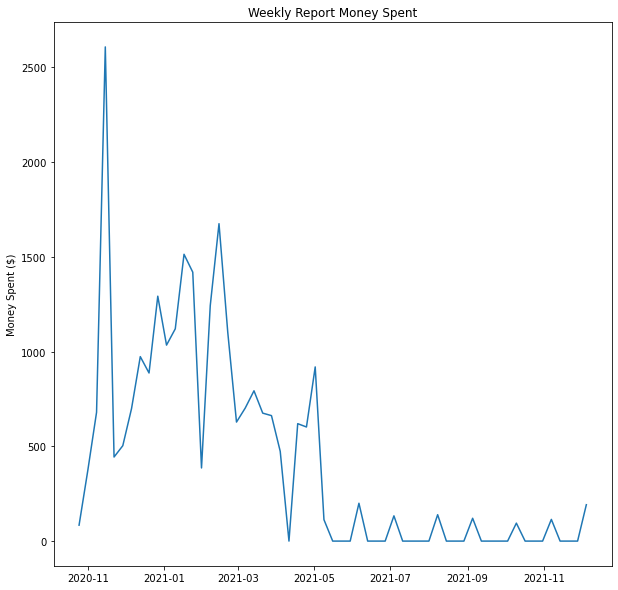

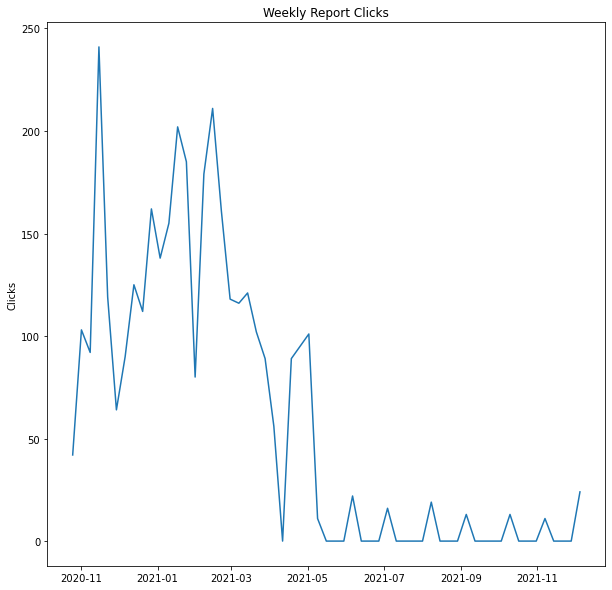

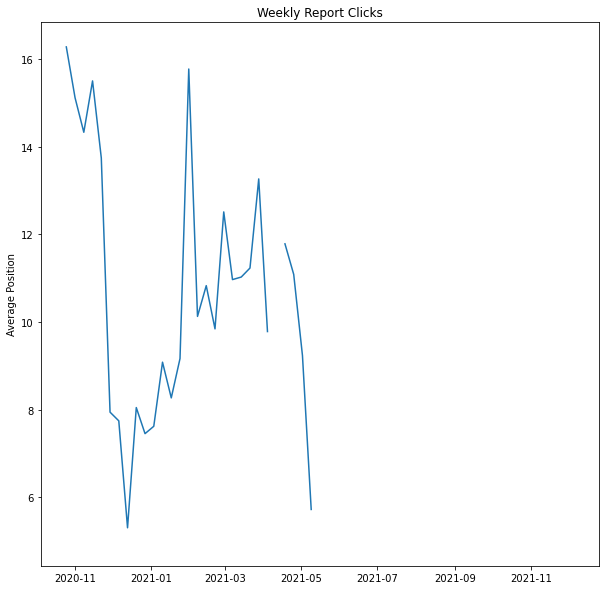

In [208]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df2.resample('W').sum()['Money Spent ($)'])
plt.title("Weekly Report Money Spent")
plt.ylabel('Money Spent ($)')
plt.show()
plt.plot(df2.resample('W').sum()['Clicks'])
plt.title("Weekly Report Clicks")
plt.ylabel('Clicks')
plt.show()
plt.plot(df2.resample('W').mean()['Average Position'])
plt.title("Weekly Report Clicks")
plt.ylabel('Average Position')
plt.show()



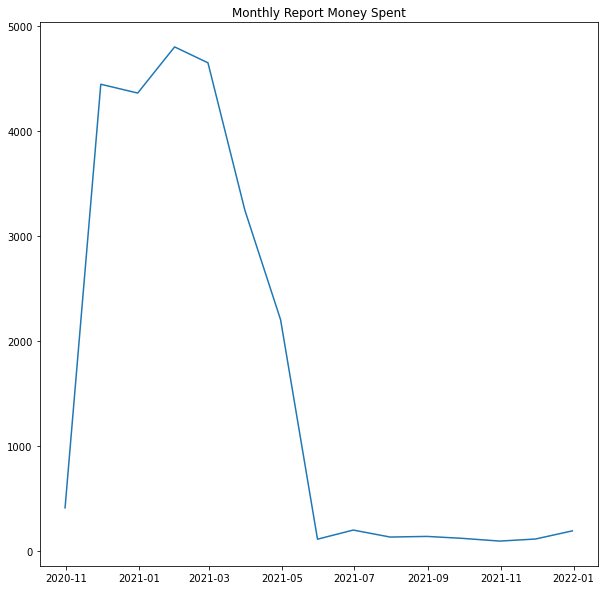

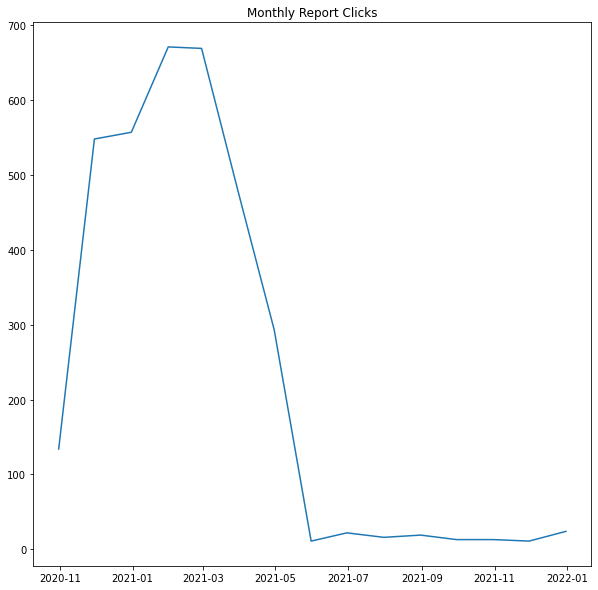

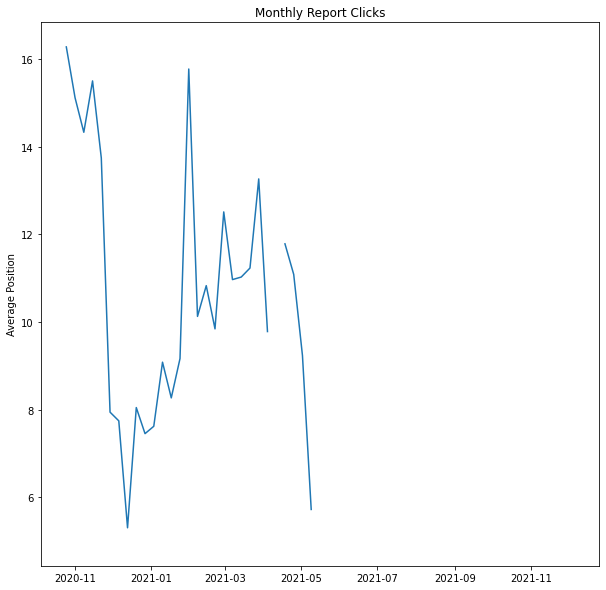

In [82]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df2.resample('M').sum()['Money Spent ($)'])
plt.title("Monthly Report Money Spent")
plt.show()
plt.plot(df2.resample('M').sum()['Clicks'])
plt.title("Monthly Report Clicks")
plt.show()
plt.plot(df2.resample('W').mean()['Average Position'])
plt.title("Monthly Report Clicks")
plt.ylabel('Average Position')
plt.show()

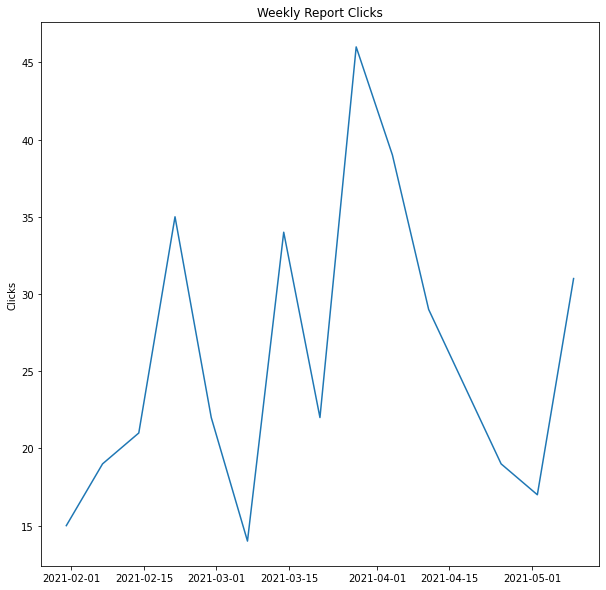

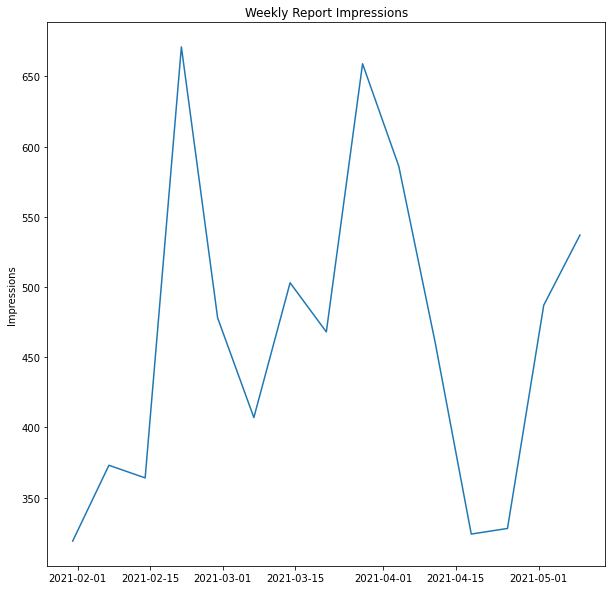

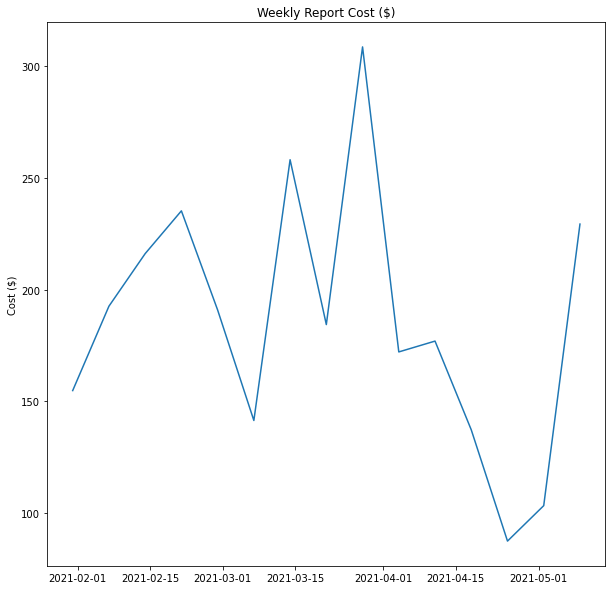

In [90]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df1.resample('W').sum()['Clicks'])
plt.title("Weekly Report Clicks")
plt.ylabel('Clicks')
plt.show()
plt.plot(df1.resample('W').sum()['Impressions'])
plt.title("Weekly Report Impressions")
plt.ylabel('Impressions')
plt.show()
plt.plot(df1.resample('W').sum()['Cost ($)'])
plt.title("Weekly Report Cost ($)")
plt.ylabel('Cost ($)')
plt.show()



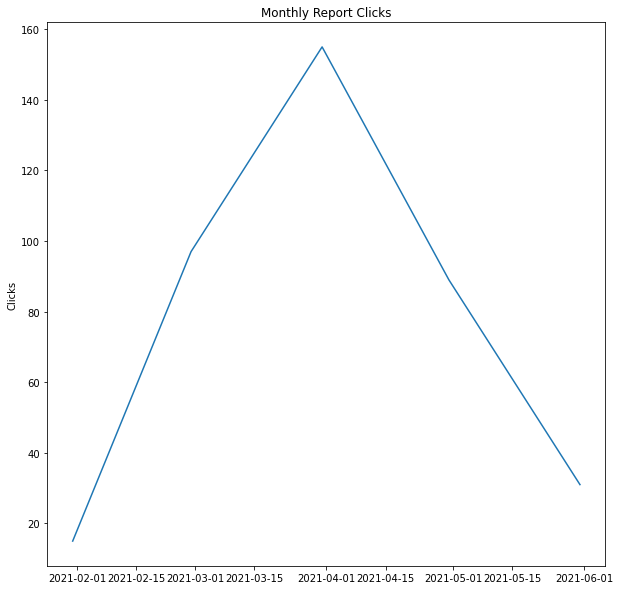

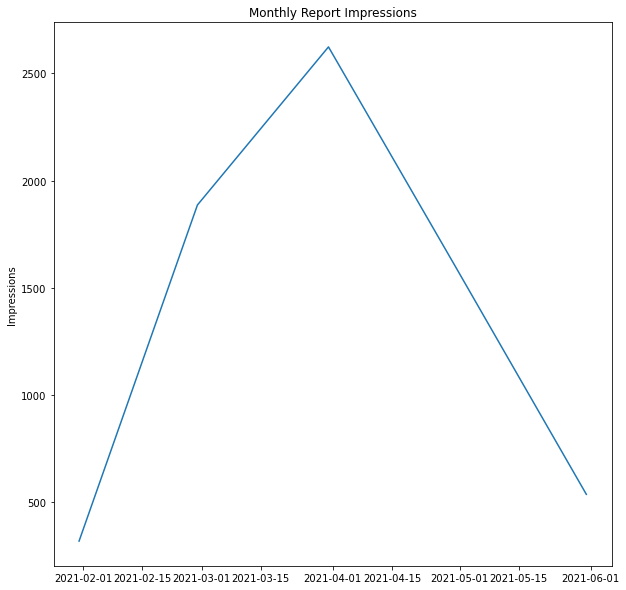

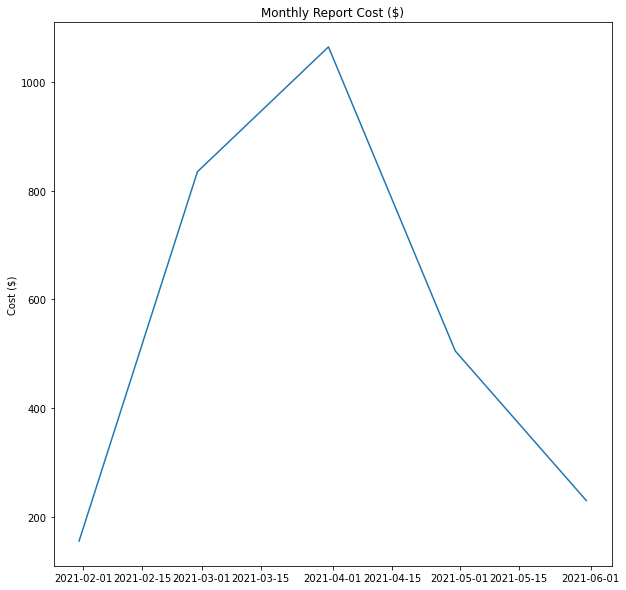

In [91]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df1.resample('M').sum()['Clicks'])
plt.title("Monthly Report Clicks")
plt.ylabel('Clicks')
plt.show()
plt.plot(df1.resample('M').sum()['Impressions'])
plt.title("Monthly Report Impressions")
plt.ylabel('Impressions')
plt.show()
plt.plot(df1.resample('M').sum()['Cost ($)'])
plt.title("Monthly Report Cost ($)")
plt.ylabel('Cost ($)')
plt.show()



In [199]:
df2_channel=df2.groupby(['Channel']).sum()
df2_channel['Average Postion 1']=df2.groupby(['Channel']).mean()['Average Position']
df2_channel=df2_channel.drop(labels='Average Position', axis=1)
df2_channel['Clicks/Money Spent']=df2_channel['Clicks']/df2_channel['Money Spent ($)']
df2_channel

,Clicks,Money Spent ($),Average Postion 1,Clicks/Money Spent
Channel,,,,
Capterra,2377.0,19461.85,9.299661,0.122136
GetApp,1039.0,5449.90,13.016570,0.190646
Software Advice,61.0,311.50,7.954545,0.195827


In [188]:
df1_keyword=df1.groupby(['Search Keyword']).sum()
df1_keyword['Clicks/Cost']=df1_keyword['Clicks']/df1_keyword['Cost ($)']
df1_keyword['Impressions/Cost']=df1_keyword['Impressions']/df1_keyword['Cost ($)']
display(df1_keyword)
display(df1_keyword.sort_values(by=['Clicks/Cost']))
display(df1_keyword.sort_values(by=['Impressions/Cost']))

,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Search Keyword,,,,,
=+pool +reservation software,0,1,0.00,NaN,inf
booking management software,45,800,543.56,0.082788,1.471779
pilates booking system,0,5,0.00,NaN,inf
pilates management software,0,0,0.00,NaN,NaN
pilates studio booking software,10,406,100.88,0.099128,4.024584
pilates studio management software,0,8,0.00,NaN,inf
pilates studio software,4,14,39.16,0.102145,0.357508
pilates studio software manager,0,0,0.00,NaN,NaN
pool booking app,14,181,74.12,0.188883,2.441986


,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Search Keyword,,,,,
pool scheduling software,12,102,146.56,0.081878,0.695961
booking management software,45,800,543.56,0.082788,1.471779
pool reservation system,23,149,240.72,0.095547,0.618976
pilates studio booking software,10,406,100.88,0.099128,4.024584
pilates studio software,4,14,39.16,0.102145,0.357508
yoga studio booking software,95,3430,829.24,0.114563,4.136318
yoga studio software,11,371,93.34,0.117849,3.974716
reservation management system,30,517,233.29,0.128595,2.216126
pool booking app,14,181,74.12,0.188883,2.441986


,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Search Keyword,,,,,
pilates studio software,4,14,39.16,0.102145,0.357508
pool reservation system,23,149,240.72,0.095547,0.618976
pool scheduling software,12,102,146.56,0.081878,0.695961
swimming pool reservation system,4,21,19.65,0.203562,1.068702
booking management software,45,800,543.56,0.082788,1.471779
pool reservation software,85,553,333.93,0.254544,1.656036
reservation management system,30,517,233.29,0.128595,2.216126
pool booking app,14,181,74.12,0.188883,2.441986
swimming pool booking system,29,128,39.66,0.731215,3.227433


In [210]:
df1_keywordt=df1.groupby(['Keyword type']).sum()
df1_keywordt['Clicks/Cost']=df1_keywordt['Clicks']/df1_keywordt['Cost ($)']
df1_keywordt['Impressions/Cost']=df1_keywordt['Impressions']/df1_keywordt['Cost ($)']
display(df1_keywordt)
display(df1_keywordt.sort_values(by=['Clicks/Cost']))
display(df1_keywordt.sort_values(by=['Impressions/Cost']))

,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Keyword type,,,,,
Broad,200,4476,1264.80,0.158128,3.538899
Exact,99,1060,580.33,0.170593,1.826547
Phrase,88,1429,943.55,0.093265,1.514493


,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Keyword type,,,,,
Phrase,88,1429,943.55,0.093265,1.514493
Broad,200,4476,1264.80,0.158128,3.538899
Exact,99,1060,580.33,0.170593,1.826547


,Clicks,Impressions,Cost ($),Clicks/Cost,Impressions/Cost
Keyword type,,,,,
Phrase,88,1429,943.55,0.093265,1.514493
Exact,99,1060,580.33,0.170593,1.826547
Broad,200,4476,1264.80,0.158128,3.538899


In [200]:
df2_location=df2.groupby(['Location']).sum()
df2_location['Average Postion 1']=df2.groupby(['Channel']).mean()['Average Position']
df2_location=df2_location.drop(labels='Average Position', axis=1)
df2_location['Clicks/Money Spent']=df2_location['Clicks']/df2_location['Money Spent ($)']
df2_location

,Clicks,Money Spent ($),Average Postion 1,Clicks/Money Spent
Location,,,,
AUSTRALIA,266.0,1192.75,NaN,0.223014
Australia,13.0,31.50,NaN,0.412698
CANADA,235.0,1277.50,NaN,0.183953
Canada,16.0,92.25,NaN,0.173442
Middle East,1.0,0.00,NaN,inf
SINGAPORE,454.0,2100.75,NaN,0.216113
Singapore,17.0,142.50,NaN,0.119298
UK,1.0,10.75,NaN,0.093023
UNITED KINGDOM,681.0,4177.85,NaN,0.163003


In [202]:
df2_channel.to_excel("Channel.xlsx")
df1_keyword.to_excel("Keyword.xlsx")
df2_location.to_excel("Location.xlsx")

In [211]:
df1_keywordt.to_excel("Keyword_type.xlsx")